In [1]:
import pandas as pd
gpt4_group_df = pd.read_csv('./qwen/data/KPM_finetuned_model_qwen_1by1.csv')
print(gpt4_group_df.columns)
print(len(gpt4_group_df))

Index(['topic', 'stance', 'argument', 'matched_kp(0_1_2_3)',
       'confidence_score(0_1_2_3)', 'matched_kp(4_7_8_15)',
       'confidence_score(4_7_8_15)', 'matched_kp(5_6_9_10)',
       'confidence_score(5_6_9_10)', 'matched_kp(11_12_13_14)',
       'confidence_score(11_12_13_14)', 'matched_kp(16_17_18_19)',
       'confidence_score(16_17_18_19)', 'matched_kp(20_21_22_23)',
       'confidence_score(20_21_22_23)', 'matched_kp(24_25_26_27)',
       'confidence_score(24_25_26_27)'],
      dtype='object')
7238


In [2]:
total = 0.0
for index,row in gpt4_group_df.iterrows():
    a = gpt4_group_df.at[index,'confidence_score(0_1_2_3)']
    b = gpt4_group_df.at[index,'confidence_score(4_7_8_15)']
    c = gpt4_group_df.at[index,'confidence_score(5_6_9_10)']
    d = gpt4_group_df.at[index,'confidence_score(11_12_13_14)']
    e = gpt4_group_df.at[index,'confidence_score(16_17_18_19)']
    f = gpt4_group_df.at[index,'confidence_score(20_21_22_23)']
    g = gpt4_group_df.at[index,'confidence_score(24_25_26_27)']
    h = [a,b,c,d,e,f,g]
    max_num = max(h)
    total += max_num
print(total/len(gpt4_group_df))

0.8149557075324938


In [3]:
import pandas as pd
gpt4_group_1_df = pd.read_csv('./result/KPM_prompt_based_in_group.csv')
gpt4_group_2_df = pd.read_csv('./result/KPM_prompt_based_in_hybrid.csv')
gpt4_group_3_df = pd.read_csv('./result/KPM_prompt_based_one_by_one.csv')
gpt4_group_score_1 = gpt4_group_1_df['confidence_score(group)'].values.tolist()
gpt4_group_score_2 = gpt4_group_2_df['confidence_score(group)'].values.tolist()
gpt4_group_score_3 = gpt4_group_3_df['confidence_score(group)'].values.tolist()

gpt4_1by1_score_1 = gpt4_group_1_df['confidence_score(1by1)'].values.tolist()
gpt4_1by1_score_2 = gpt4_group_2_df['confidence_score(1by1)'].values.tolist()
gpt4_1by1_score_3 = gpt4_group_3_df['confidence_score(1by1)'].values.tolist()

In [4]:
import numpy as np
data = gpt4_1by1_score_3
print(np.max(data))
print(np.min(data))
print(np.mean(data))
print(np.var(data))

1.0
0.05
0.8667767339043935
0.02541959812130278


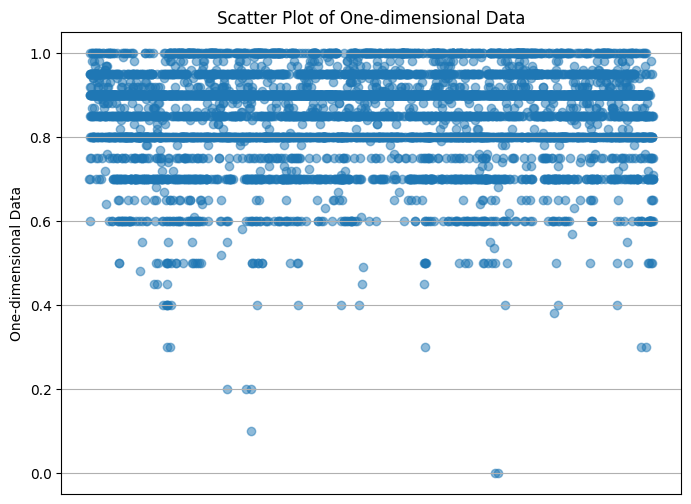

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一维随机数据
one_dimensional_data = gpt4_1by1_score_1
# 创建一个与数据点数量相同的索引数组
indices = np.arange(len(one_dimensional_data))

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(indices, one_dimensional_data, alpha=0.5)  # 使用索引作为X轴坐标
plt.ylabel('One-dimensional Data')
plt.title('Scatter Plot of One-dimensional Data')
plt.grid(True)
plt.xticks([])
plt.show()


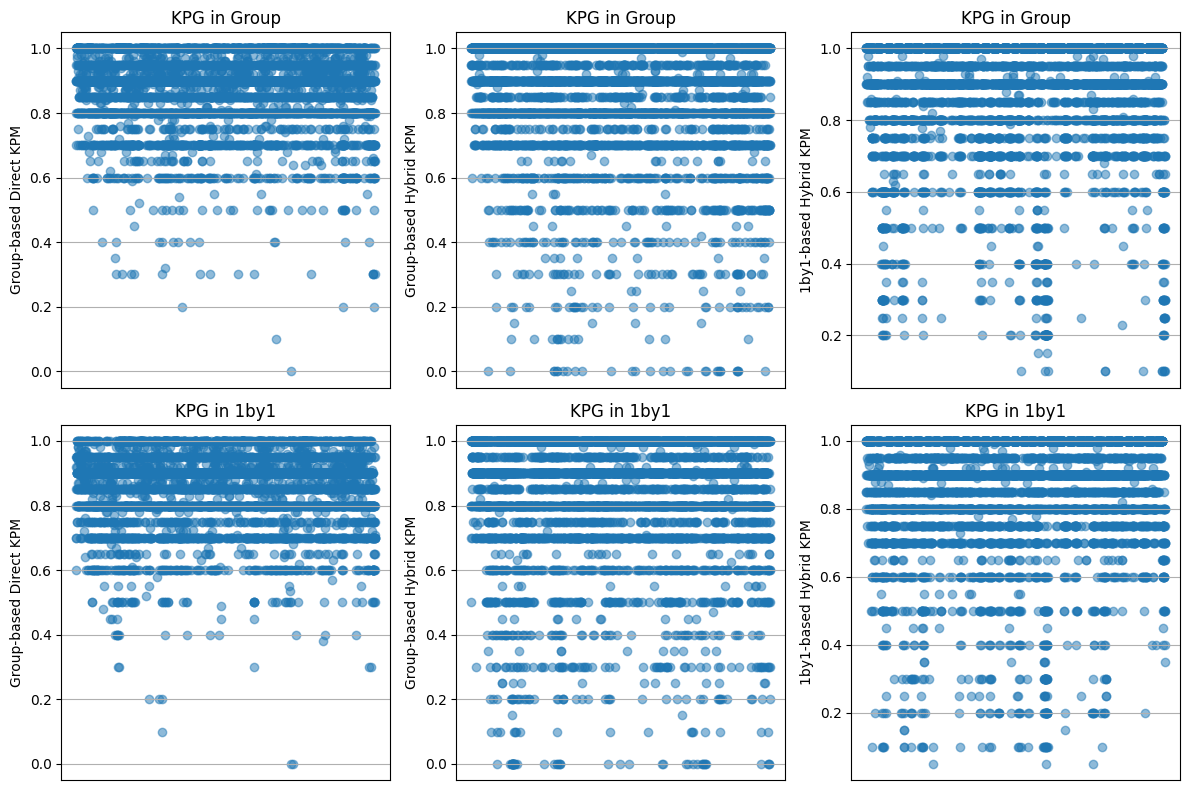

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 生成6组一维随机数据
np.random.seed(0)
data_list = [gpt4_group_score_1,gpt4_group_score_2,gpt4_group_score_3,gpt4_1by1_score_1,gpt4_1by1_score_2,gpt4_1by1_score_3]  # 生成6组一维数据，每组数据范围在0到1之间

# 创建画布和子图
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 绘制6个图
# for i, data in enumerate(data_list):
#     row = i // 3  # 计算行索引
#     col = i % 3   # 计算列索引
#     axes[row, col].scatter(np.arange(len(data)), data, alpha=0.5)  # 使用全为0的横坐标
#     axes[row, col].set_ylabel('One-dimensional Data')
#     axes[row, col].set_title('Plot {}'.format(i+1))
#     axes[row, col].grid(True)
#     axes[row, col].set_xticks([])  # 隐藏横轴
row = 0
col = 0
axes[row, col].scatter(np.arange(len(gpt4_group_score_1)), gpt4_group_score_1, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Direct KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 0
col = 1
axes[row, col].scatter(np.arange(len(gpt4_group_score_2)), gpt4_group_score_2, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Hybrid KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 0
col = 2
axes[row, col].scatter(np.arange(len(gpt4_group_score_3)), gpt4_group_score_3, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('1by1-based Hybrid KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 0
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_1)), gpt4_1by1_score_1, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Direct KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 1
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_2)), gpt4_1by1_score_2, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Hybrid KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 2
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_3)), gpt4_1by1_score_3, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('1by1-based Hybrid KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴
plt.tight_layout()  # 调整子图布局，防止重叠
plt.show()

In [6]:
import pandas as pd
gpt4_group_1_df = pd.read_csv('./LLama2/data/KPM_LLama2_in_group.csv')
gpt4_group_2_df = pd.read_csv('./LLama2/data/KPM_LLama2_in_hybrid.csv')
gpt4_group_3_df = pd.read_csv('./LLama2/data/KPM_LLama2_in_1by1.csv')
gpt4_group_score_1 = gpt4_group_1_df['confidence_score(group)'].values.tolist()
gpt4_group_score_2 = gpt4_group_2_df['confidence_score(group)'].values.tolist()
gpt4_group_score_3 = gpt4_group_3_df['confidence_score(group)'].values.tolist()

gpt4_1by1_score_1 = gpt4_group_1_df['confidence_score(1by1)'].values.tolist()
gpt4_1by1_score_2 = gpt4_group_2_df['confidence_score(1by1)'].values.tolist()
gpt4_1by1_score_3 = gpt4_group_3_df['confidence_score(1by1)'].values.tolist()

In [7]:
import numpy as np
data = gpt4_1by1_score_3
print(np.max(data))
print(np.min(data))
print(np.mean(data))
print(np.var(data))

1.0
0.2
0.7427949709864604
0.010861668656665368


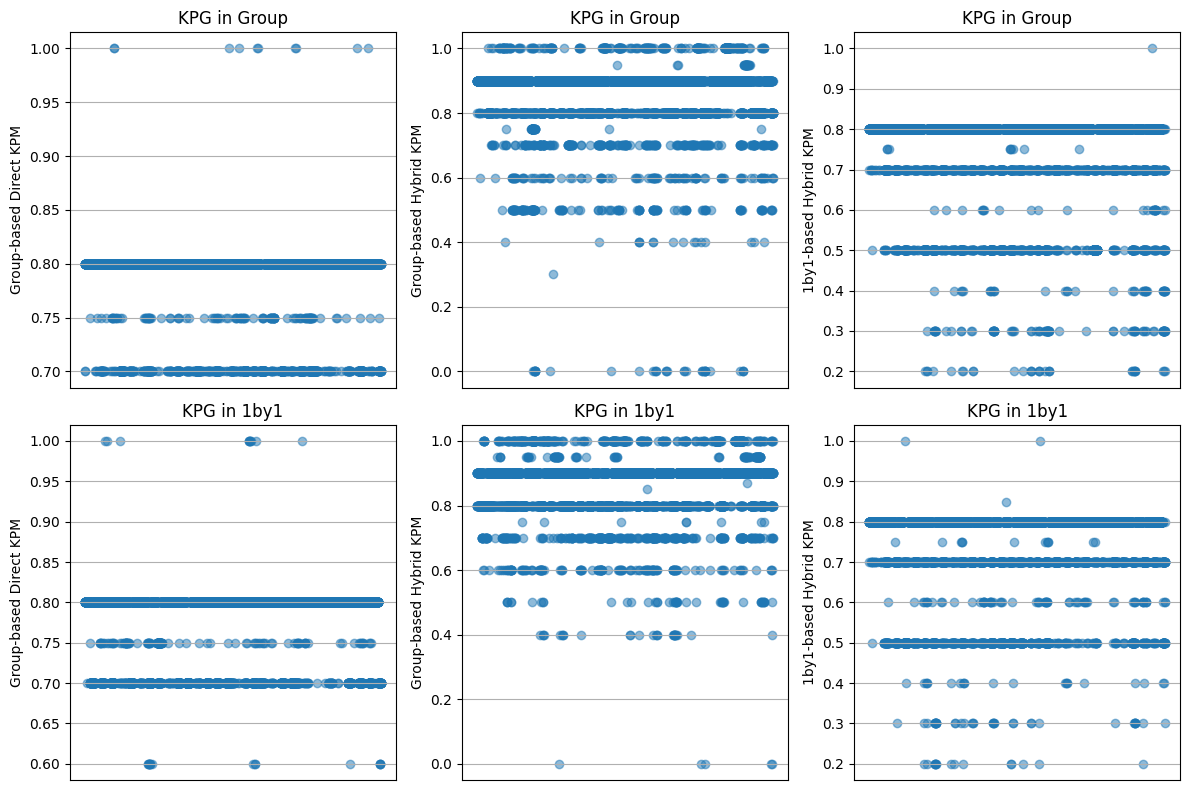

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 生成6组一维随机数据
np.random.seed(0)
data_list = [gpt4_group_score_1,gpt4_group_score_2,gpt4_group_score_3,gpt4_1by1_score_1,gpt4_1by1_score_2,gpt4_1by1_score_3]  # 生成6组一维数据，每组数据范围在0到1之间

# 创建画布和子图
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 绘制6个图
# for i, data in enumerate(data_list):
#     row = i // 3  # 计算行索引
#     col = i % 3   # 计算列索引
#     axes[row, col].scatter(np.arange(len(data)), data, alpha=0.5)  # 使用全为0的横坐标
#     axes[row, col].set_ylabel('One-dimensional Data')
#     axes[row, col].set_title('Plot {}'.format(i+1))
#     axes[row, col].grid(True)
#     axes[row, col].set_xticks([])  # 隐藏横轴
row = 0
col = 0
axes[row, col].scatter(np.arange(len(gpt4_group_score_1)), gpt4_group_score_1, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Direct KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 0
col = 1
axes[row, col].scatter(np.arange(len(gpt4_group_score_2)), gpt4_group_score_2, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Hybrid KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 0
col = 2
axes[row, col].scatter(np.arange(len(gpt4_group_score_3)), gpt4_group_score_3, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('1by1-based Hybrid KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 0
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_1)), gpt4_1by1_score_1, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Direct KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 1
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_2)), gpt4_1by1_score_2, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Hybrid KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 2
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_3)), gpt4_1by1_score_3, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('1by1-based Hybrid KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴
plt.tight_layout()  # 调整子图布局，防止重叠
plt.show()

In [12]:
import pandas as pd
gpt4_group_1_df = pd.read_csv('./qwen/data/KPM_qwen_in_group.csv')
gpt4_group_2_df = pd.read_csv('./qwen/data/KPM_qwen_in_hybrid.csv')
gpt4_group_3_df = pd.read_csv('./qwen/data/KPM_qwen_in_1by1.csv')
gpt4_group_score_1 = gpt4_group_1_df['confidence_score(group)'].values.tolist()
gpt4_group_score_2 = gpt4_group_2_df['confidence_score(group)'].values.tolist()
gpt4_group_score_3 = gpt4_group_3_df['confidence_score(group)'].values.tolist()

gpt4_1by1_score_1 = gpt4_group_1_df['confidence_score(1by1)'].values.tolist()
gpt4_1by1_score_2 = gpt4_group_2_df['confidence_score(1by1)'].values.tolist()
gpt4_1by1_score_3 = gpt4_group_3_df['confidence_score(1by1)'].values.tolist()

In [13]:
import numpy as np
data = gpt4_1by1_score_3
print(np.max(data))
print(np.min(data))
print(np.mean(data))
print(np.var(data))

1.0
0.2
0.9527272727272728
0.007990876434977015


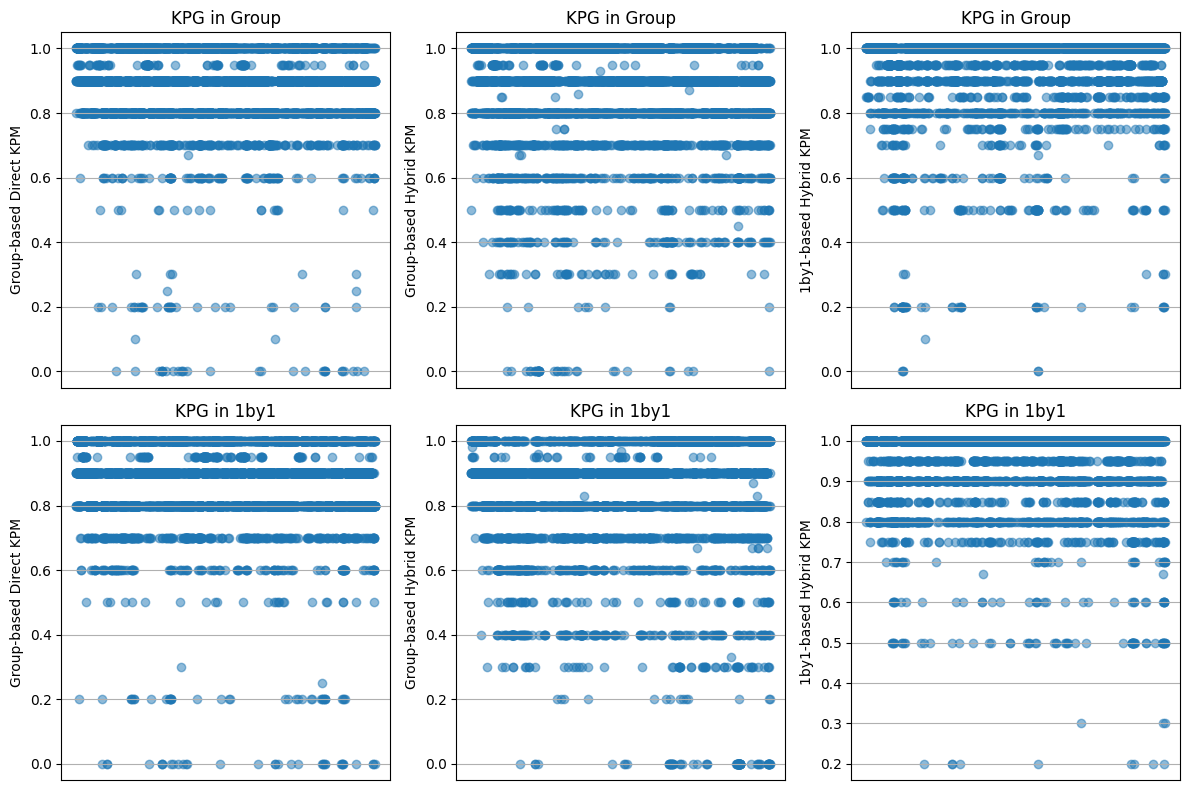

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 生成6组一维随机数据
np.random.seed(0)
data_list = [gpt4_group_score_1,gpt4_group_score_2,gpt4_group_score_3,gpt4_1by1_score_1,gpt4_1by1_score_2,gpt4_1by1_score_3]  # 生成6组一维数据，每组数据范围在0到1之间

# 创建画布和子图
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# 绘制6个图
# for i, data in enumerate(data_list):
#     row = i // 3  # 计算行索引
#     col = i % 3   # 计算列索引
#     axes[row, col].scatter(np.arange(len(data)), data, alpha=0.5)  # 使用全为0的横坐标
#     axes[row, col].set_ylabel('One-dimensional Data')
#     axes[row, col].set_title('Plot {}'.format(i+1))
#     axes[row, col].grid(True)
#     axes[row, col].set_xticks([])  # 隐藏横轴
row = 0
col = 0
axes[row, col].scatter(np.arange(len(gpt4_group_score_1)), gpt4_group_score_1, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Direct KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 0
col = 1
axes[row, col].scatter(np.arange(len(gpt4_group_score_2)), gpt4_group_score_2, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Hybrid KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 0
col = 2
axes[row, col].scatter(np.arange(len(gpt4_group_score_3)), gpt4_group_score_3, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('1by1-based Hybrid KPM')
axes[row, col].set_title('KPG in Group')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 0
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_1)), gpt4_1by1_score_1, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Direct KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 1
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_2)), gpt4_1by1_score_2, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('Group-based Hybrid KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴

row = 1
col = 2
axes[row, col].scatter(np.arange(len(gpt4_1by1_score_3)), gpt4_1by1_score_3, alpha=0.5)  # 使用全为0的横坐标
axes[row, col].set_ylabel('1by1-based Hybrid KPM')
axes[row, col].set_title('KPG in 1by1')
axes[row, col].grid(True)
axes[row, col].set_xticks([])  # 隐藏横轴
plt.tight_layout()  # 调整子图布局，防止重叠
plt.show()